For the Maven Healthcare Challenge, you'll be working as a Data Analyst for the American Hospital Association (AHA), a national organization that represents hospitals and their patients, and acts as a source of information on health care issues and trends.

As part of your role, you've been asked to analyze the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey results for the last 9 years. The intent of the HCAHPS initiative is to provide a standardized survey instrument for measuring patients’ perspectives on hospital care, and one of its 3 main goals is to "create incentives for hospitals to improve their quality of care".

Your task is to evaluate whether the HCAHPS survey has been successful in accomplishing this goal by answering questions like these:

- Have hospitals' HCAHPS scores improved over the past 9 years?
- Are there any specific areas where hospitals have made more progress than others?
- Are there any major areas of opportunity remaining?
- What recommendations can you make to hospitals to help them further improve the patient experience?


HCAHPS Patient Survey
National & state-level scores from 2013 to 2022 for the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey, a national, standardized survey of hospital patients about their experiences during a recent inpatient hospital stay.

https://mavenanalytics.io/challenges/maven-healthcare-challenge/26

# Maven Healthcare Challenge

This is project is my submission for the [Maven Healthcare Challenge](https://mavenanalytics.io/challenges/maven-healthcare-challenge/26). My goal is to analyze the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey data and determine if it was able to 
improve quality of care and service to patients. 

The HCAHPS survey is required by the Centers for Medicare and Medicaid Services (CMS) for all hospitals in the United States and is used to measure patients' perspectives on hospital care. The results are made public to encourage hospitals to improve their quality of care and service to patients, and to empower patients to make informed decisions about where they receive care.



# Exploratory Data Analysis
I started by reviewing the provided data dictionary to have a better understanding of the data. The dataset contained multiple tables across 7 CSV files, 23 columns, and 47889 rows. Required packages were imported and the dataset was read into dataframes. 

Initial review of the data revealed a `Release Period` column in multiple tables corresponding to the year the data was collected. This column was trimmed and converted to a datetime type. 

The `national_results` and `state_results` table both contained the columns `Bottom-box Percentage`, `Middle-box Percentage`, and `Top-box Percentage`, which corresponds to the percentage of patients who had a negative, neutral, or positive experience, respectively. We can use these columns to calculate the [Net Promoter Score (NPS)](https://www.qualtrics.com/experience-management/customer/net-promoter-score/), which measures patient experience and satisfaction. NPS is calculated by subtracting detractors (Botton-box Percentage) from promoters (Top-box Percentage).
>NPS = [Top-box Percentage] - [Bottom-box Percentage]

In [1]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.io as pio
from pandas.tseries.offsets import DateOffset
import geopandas as gpd
from shapely.geometry import Polygon


In [2]:
# Read CSV files into dictionary
directory_path = 'data_tables/'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]
dataframes = {os.path.basename(file).replace('.csv', ''): pd.read_csv(file) for file in file_paths}

## National Results

A line plot with average NPS created to visualize the change over time. We can see a gradual increase in score until 2021 when the score began to decline.

Further evaluation at the measure ID level revealed `H_COMP_5` and `H_COMP_7` at a noticeably lower score compared to the other measures. 
- **H_COMP_5: Communication about Medicines**
    - Before giving you any new medicine, how often did hospital staff tell you what the medicine was for? 
    - Before giving you any new medicine, how often did hospital staff describe possible side effects in a way you could understand? 
- **H_COMP_7: Care Transition**
    - During this hospital stay, staff took my preferences and those of my family or caregiver into account in deciding what my health care needs would be when I left. 
    - When I left the hospital, I had a good understanding of the things I was responsible for in managing my health. 
    - When I left the hospital, I clearly understood the purpose for taking each of my medications. 
  
The two lowest measures correspond to communication about medicines and care transition, and may be a possible area to improve on. 

Measures `H_COMP_1` and `H_COMP_2` had the highest scores, which correspond to the communication between patients and nurses and doctors, respectively.

- **H_COMP_1: Nurse Communication**
    - During this hospital stay, how often did nurses treat you with courtesy and respect? 
    - During this hospital stay, how often did nurses listen carefully to you? 
    - During this hospital stay, how often did nurses explain things in a way you could understand? 
- **H_COMP_2: Doctor Communication**
    - During this hospital stay, how often did doctors treat you with courtesy and respect? 
    - During this hospital stay, how often did doctors listen carefully to you? 
    - During this hospital stay, how often did doctors explain things in a way you could understand? 

The two highest measures correspond to communication between patients and nurses and doctors, respectively.

In [3]:
# national_results = pd.read_csv('data_tables/national_results.csv')
national_results = dataframes['national_results']

#Convert release period to datetime
national_results['Release Period'] = pd.to_datetime(national_results['Release Period'].str.lstrip('07_'))
national_results.columns = national_results.columns.str.lower().str.replace(' ', '_')
national_results['nps'] = national_results['top-box_percentage'] - national_results['bottom-box_percentage']

national_results.head()

,release_period,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,nps
0,2015-01-01,H_CLEAN_HSP,8,18,74,66
1,2015-01-01,H_COMP_1,4,17,79,75
2,2015-01-01,H_COMP_2,4,14,82,78
3,2015-01-01,H_COMP_3,9,23,68,59
4,2015-01-01,H_COMP_5,18,17,65,47


## National NPS

In [6]:
national_nps = national_results[national_results['measure_id'] == 'H_RECMND']
national_nps

,release_period,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,nps
9,2015-01-01,H_RECMND,5,24,71,66
19,2016-01-01,H_RECMND,5,24,71,66
29,2017-01-01,H_RECMND,5,23,72,67
39,2018-01-01,H_RECMND,5,23,72,67
49,2019-01-01,H_RECMND,5,23,72,67
59,2020-01-01,H_RECMND,5,23,72,67
69,2021-01-01,H_RECMND,5,23,72,67
79,2022-01-01,H_RECMND,6,23,71,65
89,2023-01-01,H_RECMND,6,25,69,63


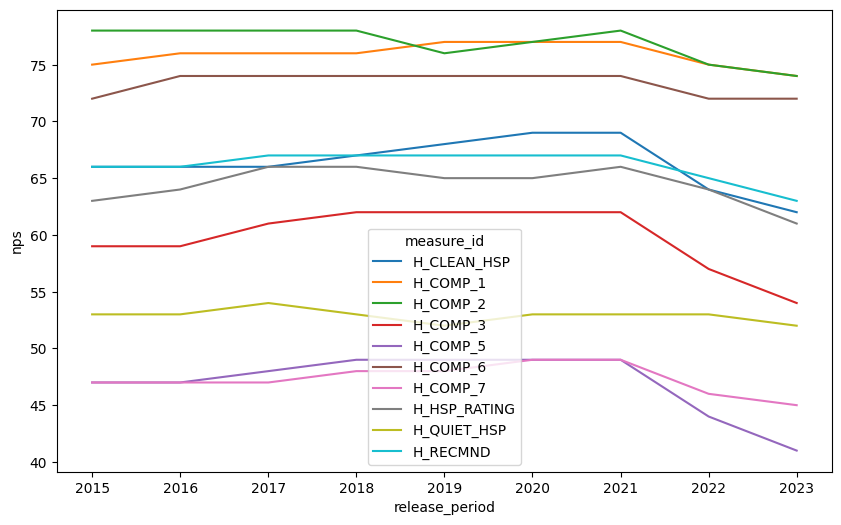

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=national_results, x='release_period', y='nps', hue='measure_id')
plt.show()

In [20]:
# national_results['release_period'] = national_results['release_period'].dt.year
ptable = pd.pivot_table(national_results, index='measure_id', columns='release_period', values='top-box_percentage')
ptable

release_period,2015,2016,2017,2018,2019,2020,2021,2022,2023
measure_id,,,,,,,,,
H_CLEAN_HSP,74,74,74,75,75,76,76,73,72
H_COMP_1,79,80,80,80,81,81,81,80,79
H_COMP_2,82,82,82,82,81,82,82,80,79
H_COMP_3,68,68,69,70,70,70,70,67,65
H_COMP_5,65,65,65,66,66,66,66,63,61
H_COMP_6,86,87,87,87,87,87,87,86,86
H_COMP_7,52,52,52,53,53,54,54,52,51
H_HSP_RATING,71,72,73,73,73,73,73,72,70
H_QUIET_HSP,62,62,63,62,62,62,62,63,62


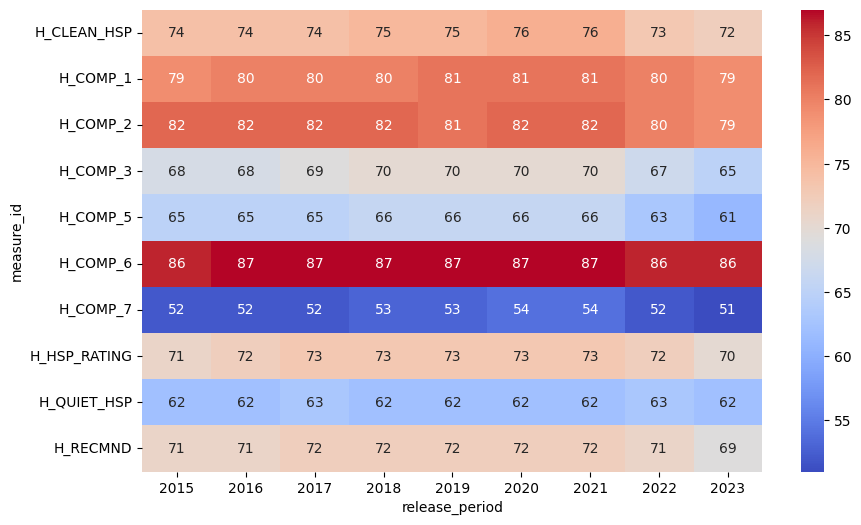

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=ptable, annot=True, cmap='coolwarm')
plt.show()

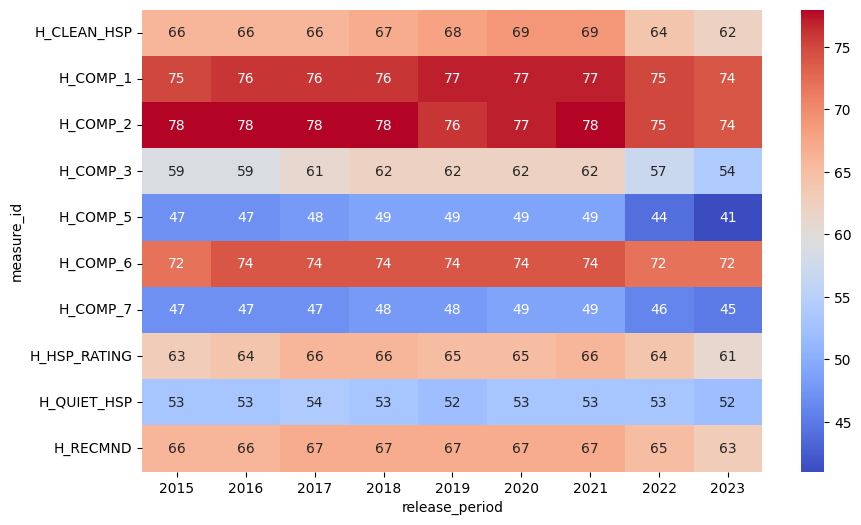

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=ptable, annot=True, cmap='coolwarm')
plt.show()

In [40]:

national_results_avg = national_results.groupby('release_period')['nps'].agg(['mean', 'median', 'std']).reset_index()
national_results_avg

,release_period,mean,median,std
0,2015-01-01,62.6,64.5,11.027239
1,2016-01-01,63.0,65.0,11.362707
2,2017-01-01,63.7,66.0,11.106054
3,2018-01-01,64.0,66.5,10.893423
4,2019-01-01,63.8,66.0,10.891383
5,2020-01-01,64.2,66.0,10.788883
6,2021-01-01,64.4,66.5,10.936178
7,2022-01-01,61.5,64.0,11.247222
8,2023-01-01,59.8,61.5,11.717034


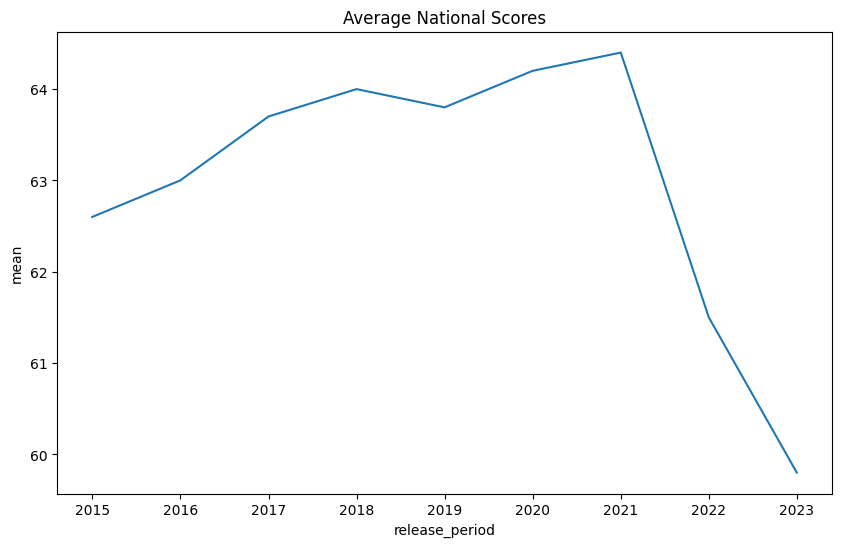

In [46]:
# Plot average national scores over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=national_results_avg, x='release_period', y='mean')
plt.title('Average National Scores')
plt.show()


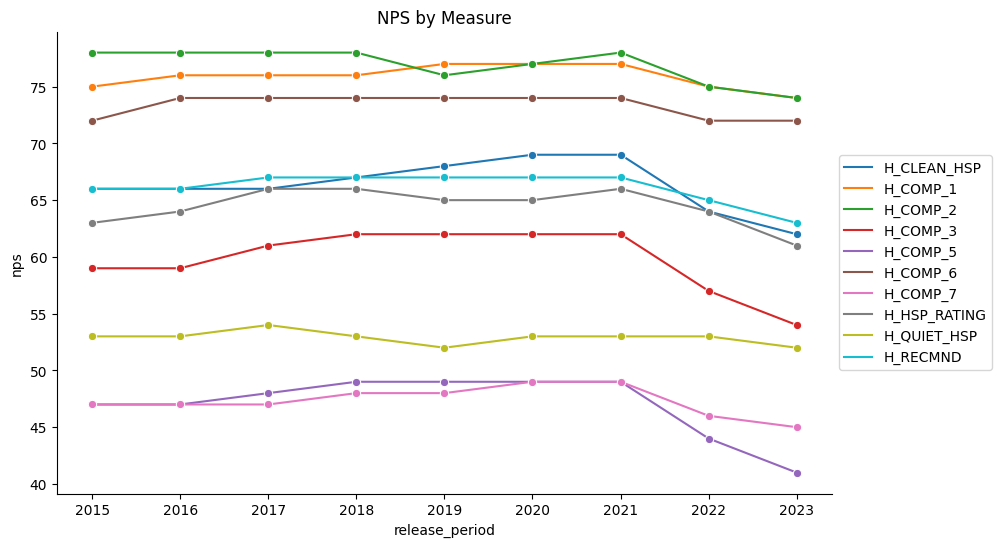

In [44]:
# NPS change over time by measure ID
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=national_results, x='release_period', y='nps', hue='measure_id', errorbar=None, marker='o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('NPS by Measure')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [67]:
# Calculate the year-over-year change in NPS for each measure
grouped_data = national_results.copy()
grouped_data['release_period'] = grouped_data['release_period'].dt.year
grouped_data['change'] = national_results.groupby('measure_id')['nps'].diff()

# Pivot the table to have years as columns and measures as rows for better visualization
pivot_table = grouped_data.pivot(index='measure_id', columns='release_period', values='change')

pivot_table


release_period,2015,2016,2017,2018,2019,2020,2021,2022,2023
measure_id,,,,,,,,,
H_CLEAN_HSP,NaN,0.0,0.0,1.0,1.0,1.0,0.0,-5.0,-2.0
H_COMP_1,NaN,1.0,0.0,0.0,1.0,0.0,0.0,-2.0,-1.0
H_COMP_2,NaN,0.0,0.0,0.0,-2.0,1.0,1.0,-3.0,-1.0
H_COMP_3,NaN,0.0,2.0,1.0,0.0,0.0,0.0,-5.0,-3.0
H_COMP_5,NaN,0.0,1.0,1.0,0.0,0.0,0.0,-5.0,-3.0
H_COMP_6,NaN,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0
H_COMP_7,NaN,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,-1.0
H_HSP_RATING,NaN,1.0,2.0,0.0,-1.0,0.0,1.0,-2.0,-3.0
H_QUIET_HSP,NaN,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,-1.0


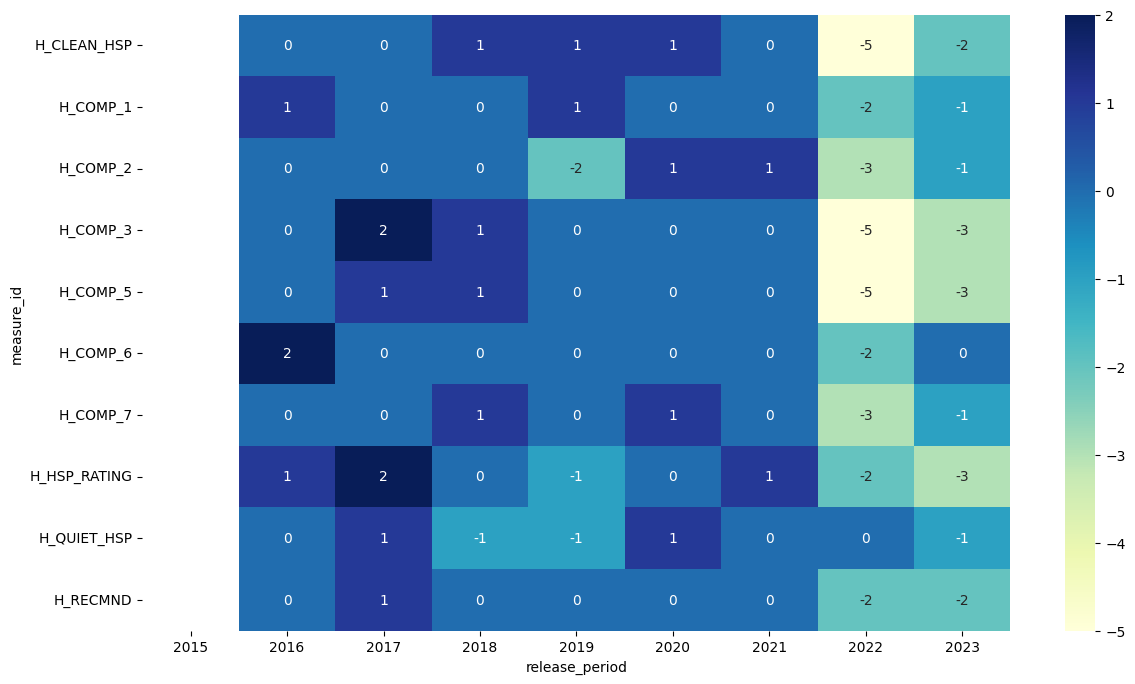

In [68]:
plt.figure(figsize=(14, 8))

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

plt.show()

## State
I proceeded to evaluate the data at the state level and found missing data for the state of Maryland in 2016. Given there was data from 2015 and 2017 from Maryland, I decided to use it find the mean of the two years and interpolate the missing data for 2016.

Once the data was cleaned, it was plotted on a map to determine the states with the highest/lowest scores. 

States with the lowest scores were primarily in the south and mid atlantic region (District of Columbia, New Jersey, Maryland, New York, Florida). 

States with the highest scores were primarily in the north central region (Nebraska, South Dakota, Minnesota, Iowa, Wisconsin, Kansas, Louisiana). 

In [5]:
# 
# state_results = pd.read_csv('data_tables/state_results.csv')
state_results = dataframes['state_results']
states = dataframes['states']
state_results['Release Period'] = pd.to_datetime(state_results['Release Period'].str.lstrip('07_'))
state_results.columns = state_results.columns.str.lower().str.replace(' ', '_')
states.columns = states.columns.str.lower().str.replace(' ', '_')

state_results = state_results.merge(states, on='state', how='left')
state_results.head()

,release_period,state,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,state_name,region
0,2015-01-01,AK,H_CLEAN_HSP,8,22,70,Alaska,Pacific
1,2015-01-01,AK,H_COMP_1,9,17,74,Alaska,Pacific
2,2015-01-01,AK,H_COMP_2,10,15,75,Alaska,Pacific
3,2015-01-01,AK,H_COMP_3,11,21,68,Alaska,Pacific
4,2015-01-01,AK,H_COMP_5,19,17,64,Alaska,Pacific


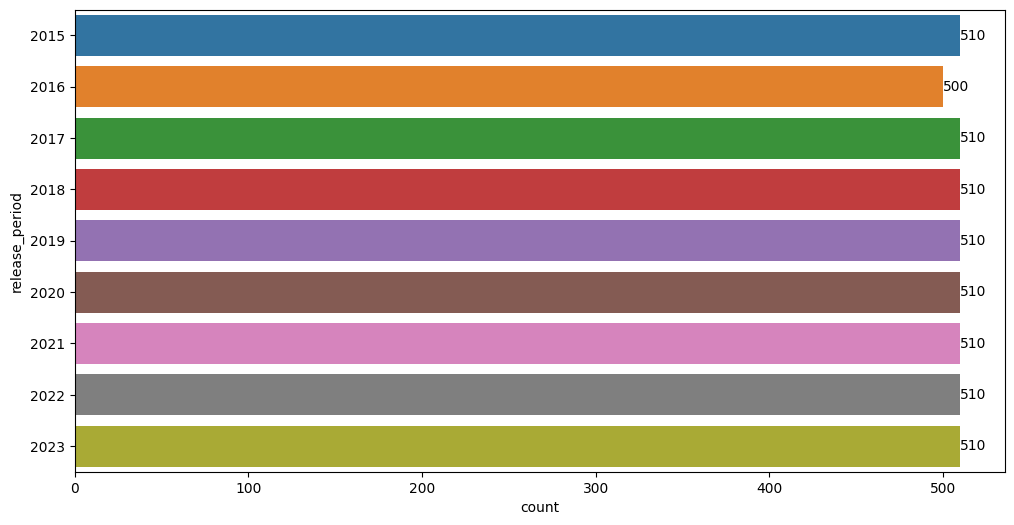

In [4]:
# Count of states by year; find missing data
year = state_results.release_period.dt.year
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=state_results, y=year)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [4]:
# Interpolate missing MD 2016 data
# New dataframes for MD 2015 and 2017 data
df = state_results.copy()
md_2015 = df[(df.state == 'MD') & (df.release_period == '2015-01-01')]
md_2017 = df[(df.state == 'MD') & (df.release_period == '2017-01-01')]

# Interpolate 2016 data using average of 2015 and 2017 data
md_inter = md_2015.copy()
for col in ['bottom-box_percentage', 'middle-box_percentage', 'top-box_percentage']:
    md_inter[col] = (md_2015[col].values + md_2017[col].values) / 2
md_inter['release_period'] = md_inter['release_period'] + DateOffset(years=1)

# Concatenate interpolated data with original dataframe
state_results = pd.concat([state_results, md_inter], ignore_index=True)
state_results

,release_period,state,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,state_name,region
0,2015-01-01,AK,H_CLEAN_HSP,8.0,22.0,70.0,Alaska,Pacific
1,2015-01-01,AK,H_COMP_1,9.0,17.0,74.0,Alaska,Pacific
2,2015-01-01,AK,H_COMP_2,10.0,15.0,75.0,Alaska,Pacific
3,2015-01-01,AK,H_COMP_3,11.0,21.0,68.0,Alaska,Pacific
4,2015-01-01,AK,H_COMP_5,19.0,17.0,64.0,Alaska,Pacific
...,...,...,...,...,...,...,...,...
4585,2016-01-01,MD,H_COMP_6,14.0,0.0,86.0,Maryland,South Atlantic
4586,2016-01-01,MD,H_COMP_7,7.0,45.0,48.0,Maryland,South Atlantic
4587,2016-01-01,MD,H_HSP_RATING,10.0,25.0,65.0,Maryland,South Atlantic
4588,2016-01-01,MD,H_QUIET_HSP,12.0,30.5,57.5,Maryland,South Atlantic


In [7]:
# Calculate NPS
state_results['nps'] = state_results['top-box_percentage'] - state_results['bottom-box_percentage']
state_results

,release_period,state,measure_id,bottom-box_percentage,middle-box_percentage,top-box_percentage,state_name,region,nps
0,2015-01-01,AK,H_CLEAN_HSP,8,22,70,Alaska,Pacific,62
1,2015-01-01,AK,H_COMP_1,9,17,74,Alaska,Pacific,65
2,2015-01-01,AK,H_COMP_2,10,15,75,Alaska,Pacific,65
3,2015-01-01,AK,H_COMP_3,11,21,68,Alaska,Pacific,57
4,2015-01-01,AK,H_COMP_5,19,17,64,Alaska,Pacific,45
...,...,...,...,...,...,...,...,...,...
4575,2023-01-01,WY,H_COMP_6,14,0,86,Wyoming,Mountain,72
4576,2023-01-01,WY,H_COMP_7,5,41,54,Wyoming,Mountain,49
4577,2023-01-01,WY,H_HSP_RATING,7,22,71,Wyoming,Mountain,64
4578,2023-01-01,WY,H_QUIET_HSP,6,28,66,Wyoming,Mountain,60


In [8]:
# Lowest NPS by state
low_mean_nps = state_results.groupby(['state', 'state_name', 'region'])['nps'].agg(nps='mean').sort_values(by='nps', ascending=True).reset_index()
low_mean_nps.head(10)

,state,state_name,region,nps
0,DC,District of Columbia,South Atlantic,47.877778
1,NJ,New Jersey,Mid-Atlantic,54.055556
2,MD,Maryland,South Atlantic,54.975000
3,NY,New York,Mid-Atlantic,55.077778
4,NV,Nevada,Mountain,55.166667
5,FL,Florida,South Atlantic,56.144444
6,CA,California,Pacific,56.244444
7,AZ,Arizona,Mountain,58.233333
8,NM,New Mexico,Mountain,58.655556
9,CT,Connecticut,New England,59.144444


In [9]:
# Highest NPS by state
hi_mean_nps = state_results.groupby(['state', 'state_name', 'region'])['nps'].agg(nps='mean').sort_values(by='nps', ascending=False).reset_index()
hi_mean_nps.head(10)

,state,state_name,region,nps
0,NE,Nebraska,West North Central,71.300000
1,SD,South Dakota,West North Central,71.300000
2,MN,Minnesota,West North Central,69.588889
3,IA,Iowa,West North Central,69.344444
4,WI,Wisconsin,East North Central,69.122222
5,KS,Kansas,West North Central,69.100000
6,LA,Louisiana,West South Central,68.622222
7,ID,Idaho,Mountain,68.155556
8,ND,North Dakota,West North Central,67.133333
9,ME,Maine,New England,67.077778


C:\Users\Andy\AppData\Local\Temp\ipykernel_26312\800165331.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alaska_gdf.geometry.centroid.x, alaska_gdf.geometry.centroid.y, alaska_gdf['STUSPS']):
C:\Users\Andy\AppData\Local\Temp\ipykernel_26312\800165331.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(hawaii_gdf.geometry.centroid.x, hawaii_gdf.geometry.centroid.y, hawaii_gdf['STUSPS']):


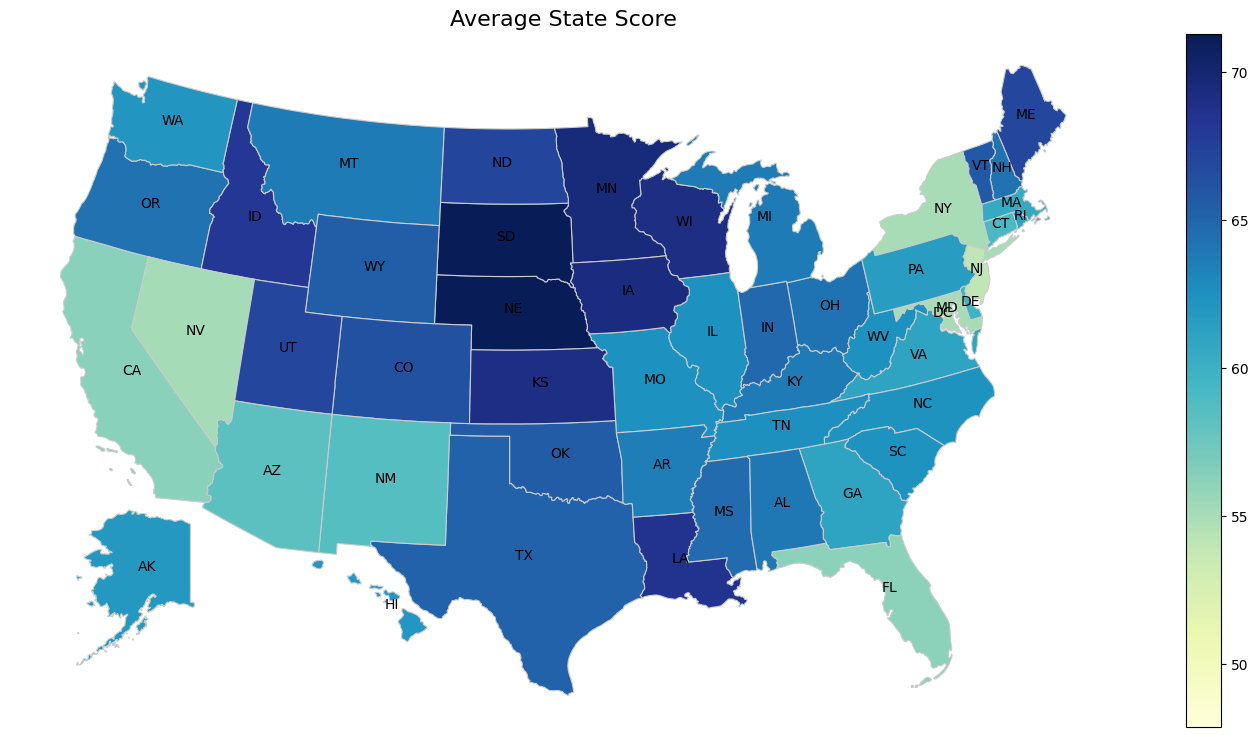

In [46]:
# Average score by state

gdf = gpd.read_file('shapefiles\cb_2022_us_state_20m.shp')
gdf = gdf.merge(mean_nps,left_on='STUSPS',right_on='state')
colorpal = 'YlGnBu'
vmin = gdf['nps'].min()
vmax = gdf['nps'].max()

#Create US map without Alaska and Hawaii
fig, ax = plt.subplots(1, figsize=(18, 9))
ax.axis('off')
usmap = gdf.to_crs(2163)
usmap[~usmap.state.isin(['HI','AK'])].plot(column='nps', cmap=colorpal, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)
ax.set_title("Average State Score", fontsize=16)  # <-- Add this line for the title


# Add Alaska to map
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.state =='AK']
alaska_gdf.clip(polygon).plot(column='nps', cmap=colorpal, linewidth=0.8, ax=akax, edgecolor='0.8', vmin=vmin, vmax=vmax)

# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.state =='HI']
hawaii_gdf.clip(hipolygon).plot(column='nps', cmap=colorpal, linewidth=0.8, ax=hiax, edgecolor='0.8', vmin=vmin, vmax=vmax)

# Annotate the contiguous US
for x, y, label in zip(usmap[~usmap.state.isin(['HI','AK'])].geometry.centroid.x, 
                       usmap[~usmap.state.isin(['HI','AK'])].geometry.centroid.y, 
                       usmap[~usmap.state.isin(['HI','AK'])]['STUSPS']):
    ax.text(x, y, label, fontsize=10, ha='center')

# Annotate Alaska
for x, y, label in zip(alaska_gdf.geometry.centroid.x, alaska_gdf.geometry.centroid.y, alaska_gdf['STUSPS']):
    akax.text(x, y, label, fontsize=10, ha='center')

# Annotate Hawaii
for x, y, label in zip(hawaii_gdf.geometry.centroid.x, hawaii_gdf.geometry.centroid.y, hawaii_gdf['STUSPS']):
    hiax.text(x, y, label, fontsize=10, ha='center')
    
plt.show()


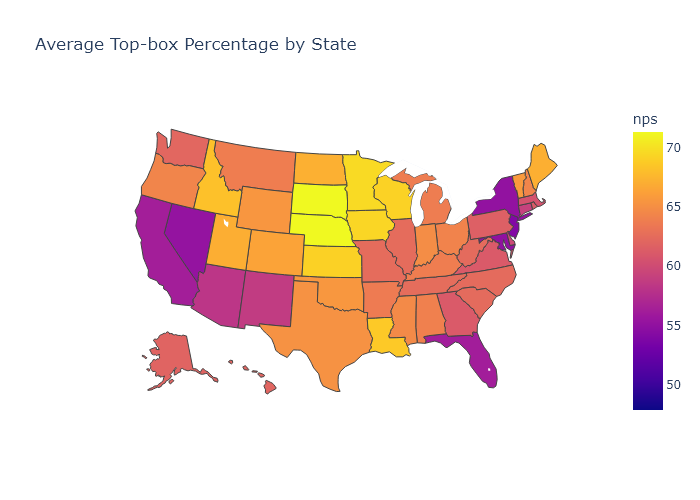

In [52]:
# Plot average top-box percentage by state
fig = px.choropleth(mean_nps, 
                    color='nps', 
                    locations='state', 
                    locationmode='USA-states', 
                    title= 'Average Top-box Percentage by State',
                    scope='usa',
                    color_continuous_scale='Plasma',)

fig.show(renderer='png')

In [11]:
# Pivot table to show NPS by year
df_nps = state_results.pivot_table(index=['measure_id', 'state'], 
                                   columns=state_results['release_period'].dt.year, 
                                   values='nps').rename_axis(None, axis=1).sort_values(by=['state', 'measure_id'], ascending=True).reset_index()

# df_nps = p_table.sort_values(by=['state', 'measure_id'], ascending=True)
df_nps

,measure_id,state,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,H_CLEAN_HSP,AK,62.0,65.0,64.0,67.0,63.0,67.0,62.0,62.0,69.0
1,H_COMP_1,AK,65.0,74.0,73.0,75.0,76.0,74.0,74.0,74.0,77.0
2,H_COMP_2,AK,65.0,79.0,76.0,75.0,74.0,78.0,77.0,75.0,77.0
3,H_COMP_3,AK,57.0,67.0,63.0,67.0,60.0,66.0,70.0,55.0,57.0
4,H_COMP_5,AK,45.0,49.0,50.0,49.0,48.0,49.0,50.0,47.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...
505,H_COMP_6,WY,78.0,78.0,78.0,74.0,74.0,74.0,74.0,76.0,72.0
506,H_COMP_7,WY,47.0,47.0,48.0,51.0,50.0,51.0,52.0,49.0,49.0
507,H_HSP_RATING,WY,58.0,63.0,65.0,63.0,63.0,65.0,64.0,64.0,64.0
508,H_QUIET_HSP,WY,54.0,57.0,58.0,54.0,54.0,55.0,54.0,58.0,60.0


## State measure ID count

## Responses
We will look at the responses of the surveys

A total of 56 unique states were found. 5 States (PR, VI, GU, MP, AS) were not part of the US. Further research revealed that the US had 5 unincorporated territories: American Samoa, Guam, the Northern Mariana Islands, Puerto Rico, and the U.S. Virgin Islands. This explains the extra 5 states found in the data which were removed. 

The `completed_surveys` column contained both numberic and categorical (Not Available, 300 or more, Between 100 and 299, Fewer than 100, Fewer than 50) data. According to the HCAHPS website, hospitals must obtain at least 300 completed HCAHPS Surveys over a 12-month reporting period and therefore the cateforical data was dropped. 

In [10]:
responses = dataframes['responses']
responses['Release Period'] = pd.to_datetime(responses['Release Period'].str.lstrip('07_'))
responses.columns = [col.lower().replace(' ', '_') for col in responses.columns]
responses.rename(columns={'response_rate_(%)': 'response_rate'}, inplace=True)

states = dataframes['states']

responses.head()

,release_period,state,facility_id,completed_surveys,response_rate
0,2015-01-01,AL,10001,300 or more,27
1,2015-01-01,AL,10005,300 or more,37
2,2015-01-01,AL,10006,300 or more,25
3,2015-01-01,AL,10007,Between 100 and 299,30
4,2015-01-01,AL,10008,Fewer than 100,28


In [77]:
responses.describe(include='all')

,release_period,state,facility_id,completed_surveys,response_rate
count,42699,42699,42699,42699,42699
unique,NaN,51,5186,3387,85
top,NaN,TX,10001,Not Available,Not Available
freq,NaN,3562,9,5294,5296
mean,2019-01-14 01:06:50.510785024,NaN,NaN,NaN,NaN
min,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
25%,2017-01-01 00:00:00,NaN,NaN,NaN,NaN
50%,2019-01-01 00:00:00,NaN,NaN,NaN,NaN
75%,2021-01-01 00:00:00,NaN,NaN,NaN,NaN
max,2023-01-01 00:00:00,NaN,NaN,NaN,NaN


In [11]:
# Find extra 5 states
responses[~responses['state'].isin(states['state'])].state.value_counts()

state
PR    470
VI     18
GU     16
MP      9
AS      7
Name: count, dtype: int64

In [12]:
# Drop extra 5 states
responses = responses[responses['state'].isin(states['state'])]


In [14]:
responses.state.nunique()

51

In [24]:
responses.groupby('state')['response_rate'].count().sort_values(ascending=False).head(10)

state
TX    3562
CA    3070
FL    1680
IL    1621
NY    1538
PA    1528
OH    1505
KS    1216
GA    1209
MI    1202
Name: response_rate, dtype: int64

In [99]:
response_year = responses.groupby(responses['release_period'].dt.year)['response_rate'].count()
response_year

release_period
2015    4603
2016    4575
2017    4754
2018    4740
2019    4836
2020    4824
2021    4806
2022    4783
2023    4778
Name: response_rate, dtype: int64

In [17]:
response_na = responses[responses.completed_surveys.str.contains('[a-zA-Z]', regex=True) == True]
response_na.completed_surveys.value_counts()

completed_surveys
Not Available          5294
300 or more            2770
FEWER THAN 50           853
Between 100 and 299     776
Fewer than 100          612
Name: count, dtype: int64

In [23]:
response_na[response_na.duplicated(subset=['release_period', 'state']) == True]

,release_period,state,facility_id,completed_surveys,response_rate
1,2015-01-01,AL,10005,300 or more,37
2,2015-01-01,AL,10006,300 or more,25
3,2015-01-01,AL,10007,Between 100 and 299,30
4,2015-01-01,AL,10008,Fewer than 100,28
5,2015-01-01,AL,10011,300 or more,31
...,...,...,...,...,...
43212,2023-01-01,TX,670280,Not Available,Not Available
43213,2023-01-01,TX,670285,Not Available,Not Available
43216,2023-01-01,TX,670310,Not Available,Not Available
43217,2023-01-01,TX,670314,Not Available,Not Available


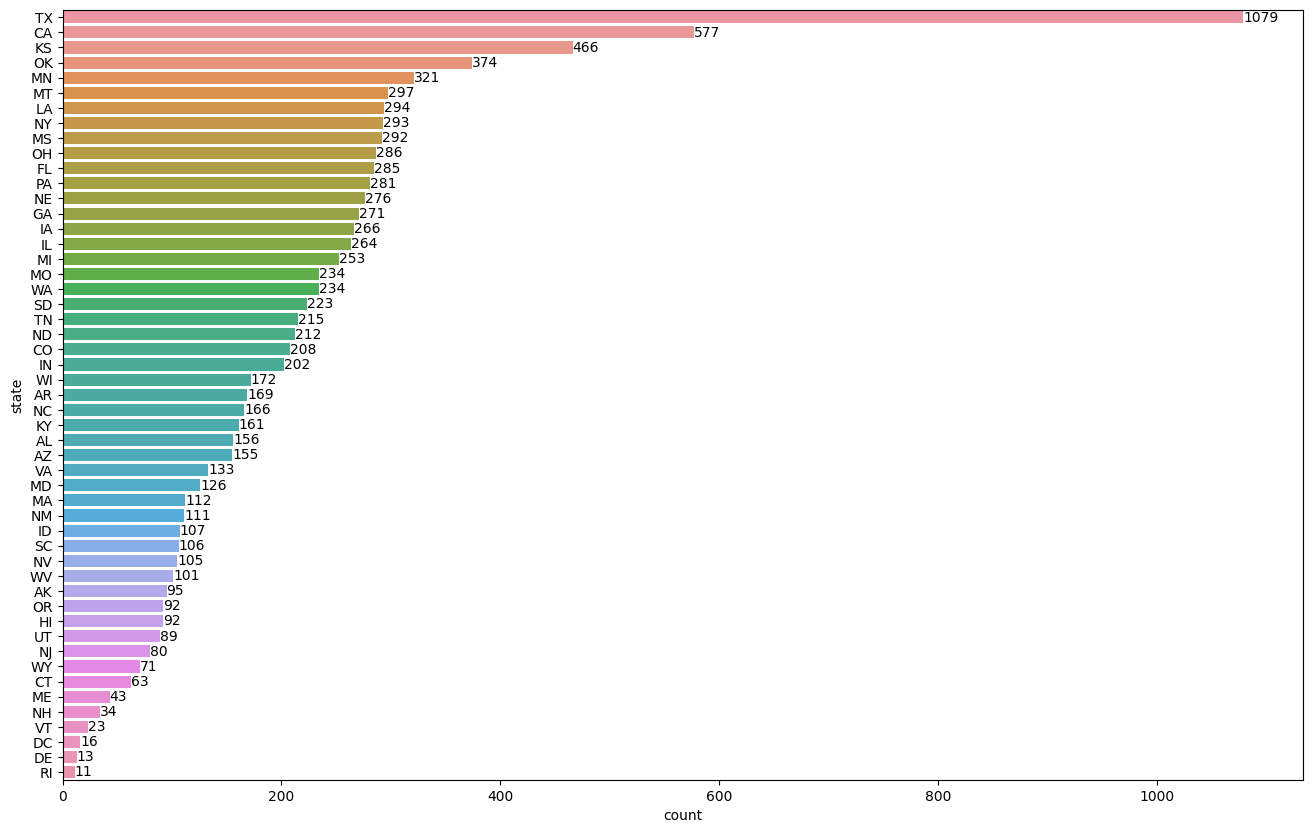

In [95]:
plt.figure(figsize=(16, 10))

ax = sns.countplot(response_na, y='state', order=response_na.state.value_counts().index)

for label in ax.containers:
    ax.bar_label(label)

plt.show()

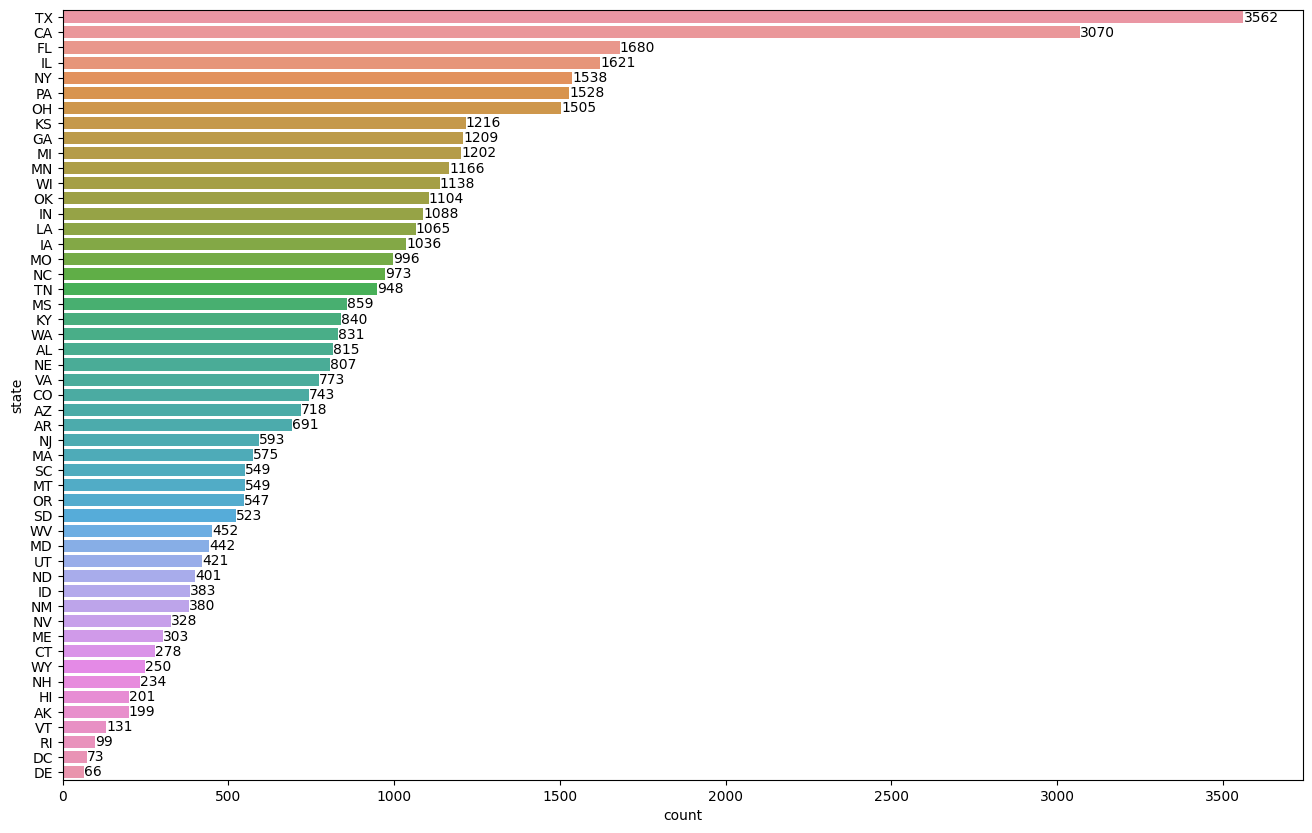

In [96]:
plt.figure(figsize=(16, 10))

ax = sns.countplot(responses, y='state', order=responses.state.value_counts().index)

for label in ax.containers:
    ax.bar_label(label)

plt.show()

In [109]:
responses.completed_surveys.value_counts()

completed_surveys
Not Available          5294
300 or more            2770
FEWER THAN 50           853
Between 100 and 299     776
Fewer than 100          612
                       ... 
2803                      1
5445                      1
2312                      1
3411                      1
4186                      1
Name: count, Length: 3387, dtype: int64

In [138]:
responses = responses[responses.completed_surveys.str.contains('[a-zA-Z]', regex=True) == False]
responses

,release_period,state,facility_id,completed_surveys,response_rate
4656,2016-01-01,AL,10001,1305,28
4657,2016-01-01,AL,10005,616,35
4658,2016-01-01,AL,10006,372,24
4659,2016-01-01,AL,10007,271,32
4660,2016-01-01,AL,10008,76,32
...,...,...,...,...,...
43207,2023-01-01,TX,670143,42,28
43208,2023-01-01,TX,670259,34,34
43209,2023-01-01,TX,670260,454,14
43214,2023-01-01,TX,670300,186,15


In [140]:
responses.completed_surveys = responses.completed_surveys.astype(int)
responses[responses.completed_surveys <= 300]

C:\Users\Andy\AppData\Local\Temp\ipykernel_2268\2370602729.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,release_period,state,facility_id,completed_surveys,response_rate
4659,2016-01-01,AL,10007,271,32
4660,2016-01-01,AL,10008,76,32
4666,2016-01-01,AL,10021,246,30
4667,2016-01-01,AL,10022,94,37
4671,2016-01-01,AL,10032,89,35
...,...,...,...,...,...
43206,2023-01-01,TX,670136,73,16
43207,2023-01-01,TX,670143,42,28
43208,2023-01-01,TX,670259,34,34
43214,2023-01-01,TX,670300,186,15


In [22]:
df = responses[responses['release_period'] == '2023-01-01']
df

,release_period,state,facility_id,completed_surveys,response_rate
38381,2023-01-01,AL,10001,482,15
38382,2023-01-01,AL,10005,773,17
38383,2023-01-01,AL,10006,1385,18
38384,2023-01-01,AL,10007,171,23
38385,2023-01-01,AL,10008,38,22
...,...,...,...,...,...
43214,2023-01-01,TX,670300,186,15
43215,2023-01-01,TX,670309,164,12
43216,2023-01-01,TX,670310,Not Available,Not Available
43217,2023-01-01,TX,670314,Not Available,Not Available


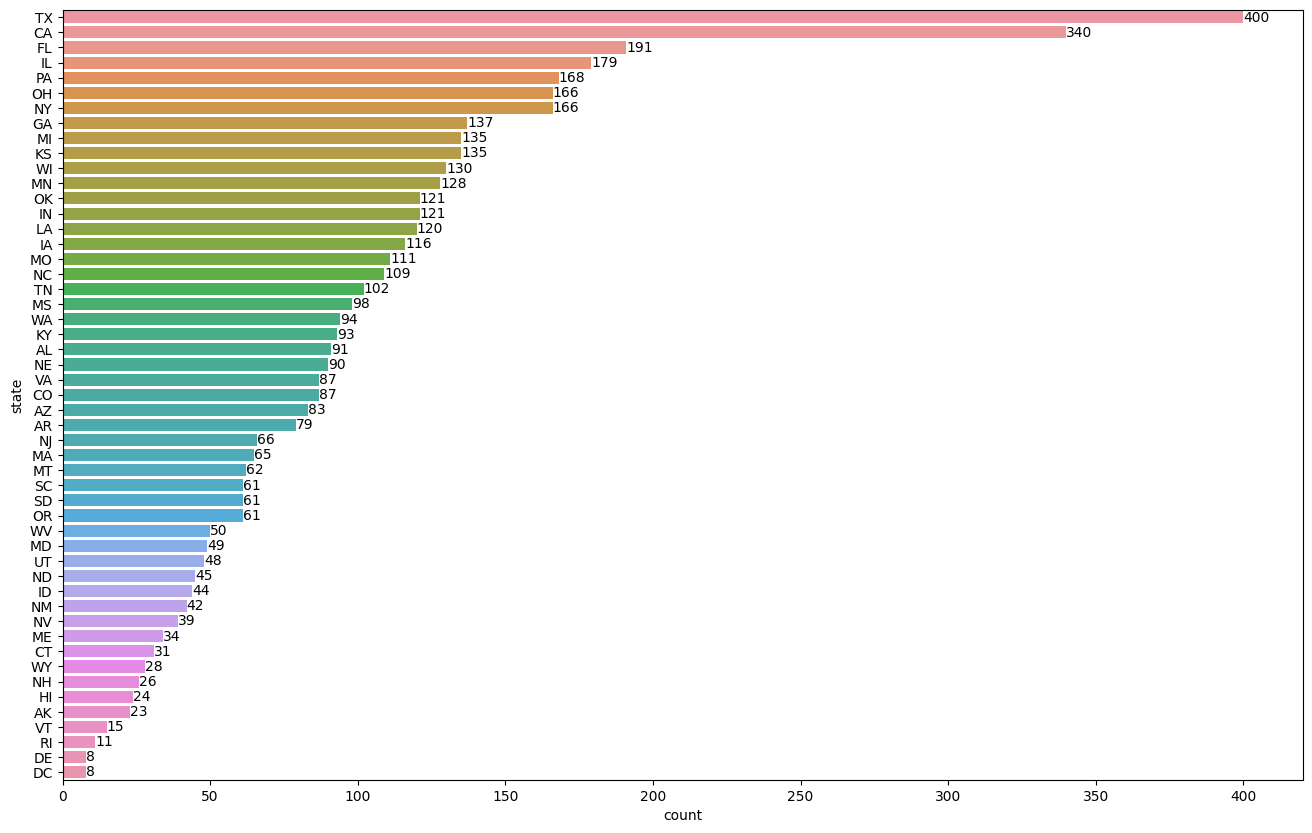

In [30]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(data=df,
              y='state',
              order=df['state'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()